<a href="https://colab.research.google.com/github/rnmarin/portfolio/blob/main/AnaliseDadosAirbnbParispt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###<center>**Renan Marin: Accountant, but not a common accountant**<center>

---




#Analise de Dados do Airbnb:

O **Airbnb** é uma das maiores de empresas hoteleiras do mundo e o mais interessante não possuí nenhum hotel.

Conectando pessoas que viajam com anfitriões que desejam alugar seus imóveis de maneira ágil, fácil e segura. Ao fim de 2018 a empresa já havia ajudado mais de **300 milhões de hóspedes** que estavam a procura de uma boa experiência.

Uma de suas virtudes é disponibilizar seus dados das principais cidades cidades do mundo através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), dando possibilidade para que possamos inferir sobre os dados e poder usar de técnicas de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<center>

A cidade escolhida para esse estudo exploratório foi:

<br>

<center>

###**PARIS**

<center><img alt="Analisando Airbnb" width="30%" src="https://upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/375px-Flag_of_France.svg.png"></center>

**Neste *notebook* realizarei a analise dos dados da ciadade de Paris e verificarei quais *insights* podem ser retirados dos dados brutos fornecidos pela Airbnb.**





<br>

Paris também conhecida por *La ville lumière*, para quem já a conhece não é necessário muitas explicações sobre sua beleza e romantismo. Uma cidade rica de detalhes e com um ar histórico facinante. Sexta capital mais visitada do mundo, segundo levantamento da *Euromonitor International* em 2019.

<br>

O apelido de cidade das luzes denota de eventos históricos importantes. Em 1665 nasce em Paris o primeiro sistema público de iluminação e também em 1881 ocorre a primeira exposição internacional de eletrecidade. Além disso, a cidade foi um importante reduto de pensadores, filósosfos e artistas do movimento iluminista.
  
<br>

<center><img alt="Analisando Airbnb" width="90%" src="https://cdn.radiofrance.fr/s3/cruiser-production/2019/03/f8d6163e-803f-4a76-b018-f56ea732ecac/1136_gettyimages-956138032.webp"></center>

Le Pont Alexandre III éclairé © Getty / Ian.CuiY

#Fonte dos Dados

Os dados foram retirados no portal  [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde foi extraido o seguinte arquivo em relação à cidade de Paris:
* listing.csv


In [ ]:
#Importando Libs:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

%matplotlib inline

In [ ]:
#Importando o dataframe:

df = pd.read_csv("/content/drive/MyDrive/Sigmoidal/listings.csv")

#Descrição dos Dados

Para uma melhor compreensão dos dados abaixo está uma relação de suas decrições.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

In [ ]:
#Visualizando as 5 entradas do df:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.04,1,364
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.19,1,2
2,4890,Quiet Historic & Cute +Free Cruise,6792,Ryan Of Cobblestone,NaN,Temple,48.86409,2.35651,Entire home/apt,69,5,23,2020-09-07,0.21,14,67
3,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,62,1,231,2020-11-05,1.65,1,90
4,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,53,15,269,2020-08-15,2.28,3,348


## **1) Analisando atributos (variáveis), quantidade de dados e os tipos de dados que o conjuto o dataframe possui**

Para uma melhor comprensão dos dados analisamos por variável e a disposição de cada informação.

In [ ]:
# identificar o volume de dados do dataframe
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificando os tipos de dados do dataframe
display(df.dtypes)

Entradas:	 65917
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## **2) Analise de dados em relação à quantidade de valores ausentes**



In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.237996
last_review                       0.237996
name                              0.000971
host_name                         0.000425
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* É possível observar que somente as variáveis `neighbourhood_group`, `reviews_per_month`, `last_review`, `host_name` e `name` possuem valores ausentes;

* `neighbourhood_group`apresenta 100% de valores ausentes;

* `reviews_per_month` e `last_review` possuem  aproximadamente 23,80% de seus valores ausentes;

* As variáveis `host_name` e `name` possuem ausencias de valores menores, correspondentes em 9,71% e 4,25%.

**Continuando com a análise sobre a qualidade do dataframe analisaremos a distribuição dos valores para identificarmos se existem, além dos já observados valores ausentes, valores que se mostram anormais em relação à amostra, conhecidos como *outliers***

## **3) Analisando a distribuição das variáveis**

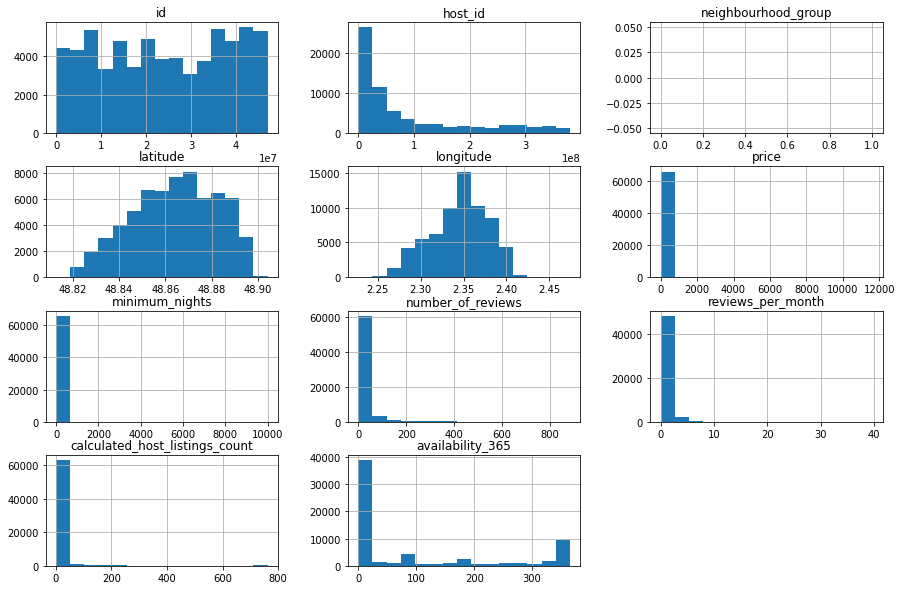

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

## **4) Analisando os dados**

Ao observar os dados apresentados acima pode-se verificar que as variáveis `price`, `minimum_nights`e `calculated_host_listing_count`, pode-se verificar que existe uma uma distribuição distorcida que dificulta a visualização e compreensão dos dados.

Para esta analise foram feitos os seguintes procedimentos:

* Resumo estátisco através do uso do método `describe()`
* Analisar os `boxplots` das variáveis selecionadas. 

In [ ]:
#resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,65917.000000,65917.000000,65917.000000,50229.000000,65917.000000,65917.000000
mean,114.280201,5.656113,18.783394,0.689335,16.427098,96.354173
std,220.155923,44.279940,40.678117,0.983954,86.017717,137.362947
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,59.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,80.000000,2.000000,5.000000,0.360000,1.000000,0.000000
75%,120.000000,4.000000,18.000000,0.870000,2.000000,179.000000
max,11600.000000,9999.000000,882.000000,39.620000,762.000000,365.000000


Observando as informações dispostas acima, pode-se tirar informações importantes sobre a distribuição e a presença de alguns valores indesejados para análise:

* O valor `price`de 75% dos dados são de  valores até 120 euros e o valor máximo é de 11.600,00 euros;
* O valor máximo de `minimun_nights`é de 9999, muito superior ao número de dias de um ano (365 dias);
* O valor mínimo de `price`é zero, o que pode representar um erro, pois sabemos que no Airbnb não existe a possibilidade de alugarmos uma acomadação grátis;

### Boxplot para Price:

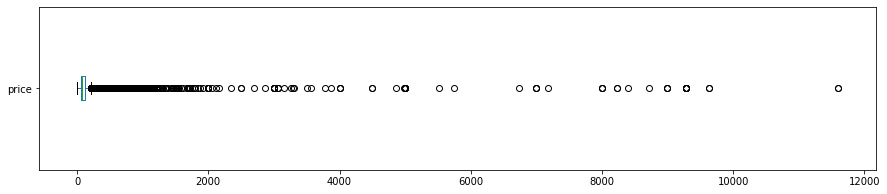


price: valores acima de 1000 euros
207 entradas
0.3140%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000 euros")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1000), figsize=(15,3));

### Boxplot para minimum_nights

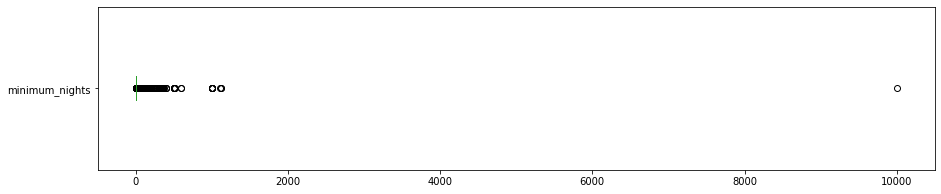

minimum_nights: valores acima de 30:
906 entradas
1.3745%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Tratando os dados

Após da verificação e constatação da presença de *outliers*, removeremos essas informações discrepantes em `price` e `minimum_nights`.

Também faremos a remoção dos valor zero para `price`.

Imprimiremos novamente os gráficos de distribuição.



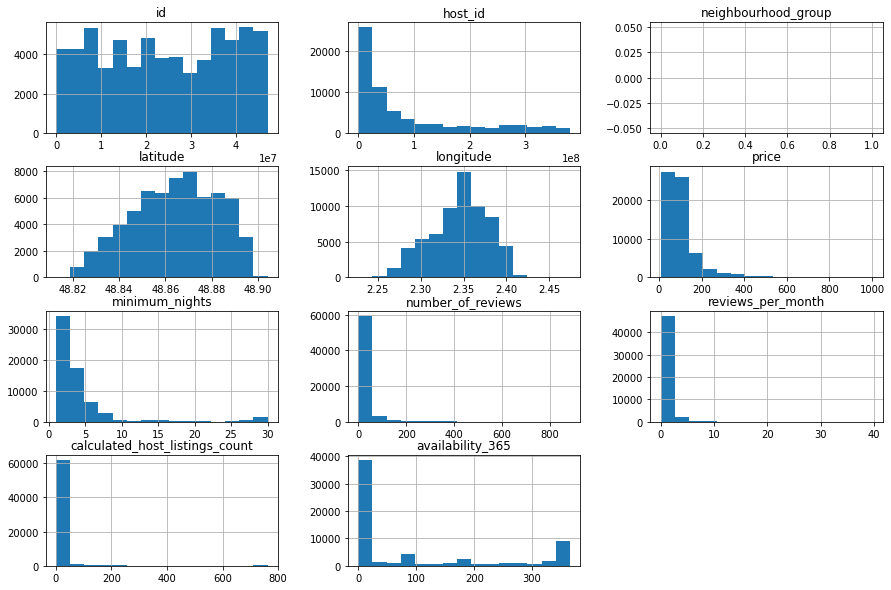

In [ ]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#removendo valores de price igual a zero
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

## **5) Média de Preços no Aluguel**


Nesta etapa são apresentados os valores médios em relação às hospedagens disponíveis:


In [ ]:
# ver a média da coluna `price``
print("Média em Euros: " + str(df_clean['price'].mean()))

Média em Euros: 106.25259451445515


A média dos preços do aluguel conforme os dados extraídos é de 106,25 euros.

## **6) Analisando os tipos de imóvel mais alugados no Airbnb**

A variável `room_type`indica o tipo de imóvel anunciado. Desta forma é possível indentificar a quantidade de tipos de imóveis são oferecidos e suas quantidades.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    55564
Private room        7457
Hotel room          1315
Shared room          416
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.858105
Private room       0.115162
Hotel room         0.020308
Shared room        0.006425
Name: room_type, dtype: float64

## **7) Analisando a distribuição de hospedagens por região e as localidades mais caras**

Agrupando as informações de `neighbourhood_group` podemos verificar a quantidade de hospedagens por região.






In [ ]:
df_clean.neighbourhood.value_counts()

Buttes-Montmartre      7282
Popincourt             6292
Vaugirard              4854
Entrepôt               4666
Batignolles-Monceau    4361
Ménilmontant           3793
Buttes-Chaumont        3772
Opéra                  3185
Passy                  3175
Temple                 2878
Reuilly                2670
Observatoire           2499
Gobelins               2292
Bourse                 2186
Panthéon               2148
Luxembourg             1928
Hôtel-de-Ville         1887
Élysée                 1752
Palais-Bourbon         1739
Louvre                 1393
Name: neighbourhood, dtype: int64

Agrupando as informações de `neighbourhood_group` e `price` é possível identificar a disposição dos preços médios de locação por regiões em Paris.



In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Élysée            183.815068
Louvre            155.232592
Palais-Bourbon    152.660150
Luxembourg        152.325207
Bourse            142.698536
Passy             140.390866
Hôtel-de-Ville    137.996290
Temple            132.189020
Panthéon          118.748138
Opéra             115.432339
Name: price, dtype: float64

Desta maneira é possível verificar que os bairros mais caros se encontram em regiões centrais próximos aos principais pontos da cidade.

<center><img alt="Analisando Airbnb" width="70%" src=http://bemiranda.com/wp-content/uploads/2016/10/paris_map_arrondissements.jpg></center>


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

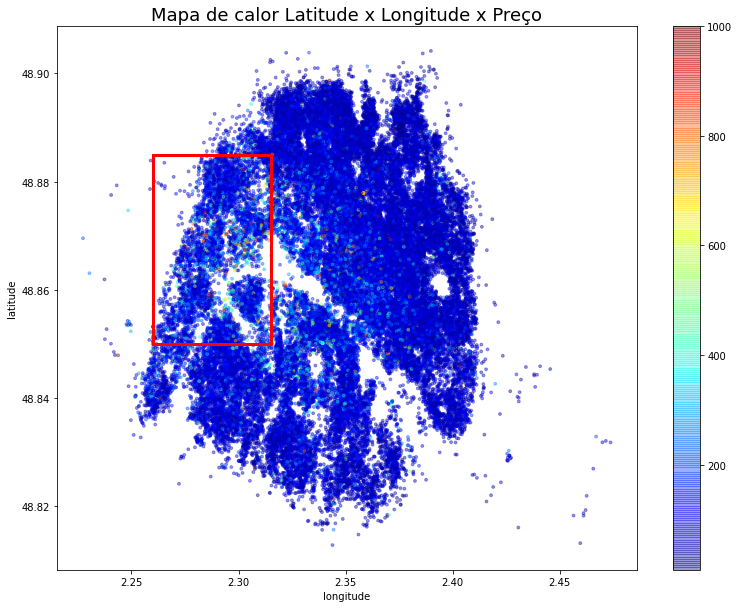

In [ ]:
# plotar os imóveis pela latitude-longitude
fig, ax = plt.subplots()

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(13,10), ax=ax)
ax.set_title('Mapa de calor Latitude x Longitude x Preço',fontsize= 18)
ax.add_patch(Rectangle((2.26,48.85), 0.055, 0.035, fc='none', ec='r', lw=3) )

plt.show()




Enfatizamos no retangulo vermelho a concetração de imóveis de preço maior. 

Não por coincidência o posicionamento do retângulo marca uma das regiões de principal concetração de pontos turísticos da cidade.

É possível uma compreensão melhor reparando no posicinamento do rio Sena em relação a figura acima da cidade de Paris.

## **8) Existem opções mais baratas em localidades nobres?**

Pudemos verificar que os preços mais caros estão nos localizados a cerca dos pontos turísticos mais relevantes da cidade, mas será que existem boas oportunidades de estadia nessas regiões.

Para analisar isso, verificaremos a distribuição dos valores por região e tentaremos identificar preços de hospedagem interessantes que podem ser considerados *outliers* em relção à distribuição de preços da região.

Localidades (`neighbourhood`) selecionadas:

* Élysée 
* Louvre
* Palais-Bourbon

####Élysée

In [ ]:
 sel_ely = df_clean.loc[df_clean['neighbourhood'] == 'Élysée']


In [ ]:
sel_ely['price'].describe()

count    1752.000000
mean      183.815068
std       169.448209
min        12.000000
25%        80.000000
50%       125.000000
75%       214.000000
max      1000.000000
Name: price, dtype: float64

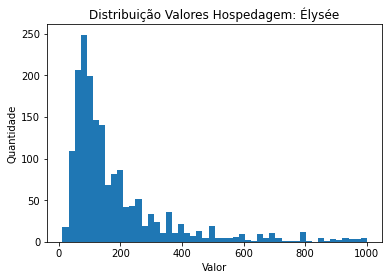

In [ ]:
fig, ax = plt.subplots()

ax.hist('price', data=sel_ely,bins=50)
ax.set_title('Distribuição Valores Hospedagem: Élysée')
ax.set_xlabel('Valor')
ax.set_ylabel('Quantidade')

plt.show()

In [ ]:
sel_ely['price'].loc[sel_ely['price'] <= 25].value_counts().sum()

8

Existem **8** opções de estadia abaixo dos **80** euros na região de **Élysée**.

Distribuidos entre os valores abaixo:

In [ ]:
sel_ely['price'].loc[sel_ely['price'] <= 25].value_counts()

20    3
17    2
12    1
25    1
24    1
Name: price, dtype: int64

####Louvre

In [ ]:
 sel_lou = df_clean.loc[df_clean['neighbourhood'] == 'Louvre']

In [ ]:
sel_lou['price'].describe()

count    1393.000000
mean      155.232592
std       121.712395
min        10.000000
25%        80.000000
50%       115.000000
75%       185.000000
max       999.000000
Name: price, dtype: float64

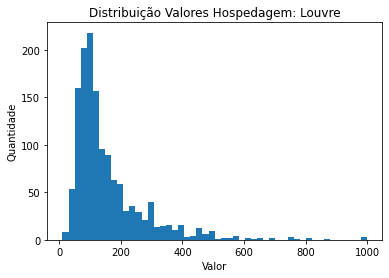

In [ ]:
fig, ax = plt.subplots()

ax.hist('price', data=sel_lou,bins=50)
ax.set_title('Distribuição Valores Hospedagem: Louvre')
ax.set_xlabel('Valor')
ax.set_ylabel('Quantidade')

plt.show()

In [ ]:
sel_lou['price'].loc[sel_lou['price'] <= 80].value_counts().sum()

355

Existem **355** opções de estadia abaixo dos **80** euros na região do **Louvre**.

Distribuidos entre os valores abaixo:

In [ ]:
sel_lou['price'].loc[sel_lou['price'] <= 80].value_counts()

80    30
60    28
65    27
70    26
75    23
50    21
55    17
79    15
59    12
73    10
45    10
68     9
74     8
69     8
72     6
58     5
40     5
53     5
62     4
71     4
30     4
35     4
78     4
77     4
49     4
44     4
66     4
56     4
64     4
76     3
46     3
39     3
41     3
42     2
27     2
63     2
36     2
67     2
54     2
43     2
61     2
47     2
48     2
51     2
10     2
57     1
37     1
34     1
33     1
32     1
28     1
52     1
26     1
24     1
23     1
Name: price, dtype: int64

####Palais-Bourbon

In [ ]:
 sel_pal = df_clean.loc[df_clean['neighbourhood'] == 'Palais-Bourbon']

In [ ]:
sel_pal['price'].describe()

count    1739.00000
mean      152.66015
std       129.48363
min        12.00000
25%        73.00000
50%       108.00000
75%       185.00000
max       999.00000
Name: price, dtype: float64

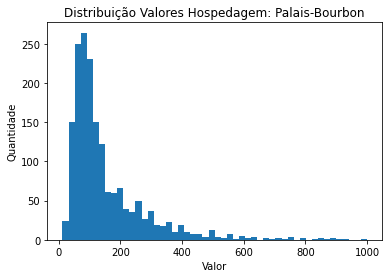

In [ ]:
fig, ax = plt.subplots()

ax.hist('price', data=sel_pal,bins=50)
ax.set_title('Distribuição Valores Hospedagem: Palais-Bourbon')
ax.set_xlabel('Valor')
ax.set_ylabel('Quantidade')

plt.show()

In [ ]:
sel_pal['price'].loc[sel_pal['price'] <= 73].value_counts().sum()

437

Existem ***437*** opções de estadia abaixo dos **73** euros na região de **Palais-Bourbon.**

Distribuidos entre os valores abaixo:

In [ ]:
sel_pal['price'].loc[sel_pal['price'] <= 73].value_counts()

60    57
70    45
50    37
65    35
40    27
55    19
45    19
35    15
69    13
71    12
59    12
49     9
30     9
52     7
72     7
73     6
63     6
68     6
62     6
39     5
46     5
38     5
47     5
56     5
67     5
64     5
51     4
57     4
61     3
25     3
28     3
32     3
66     3
48     3
54     3
44     3
58     2
43     2
41     2
29     2
53     2
42     2
33     1
34     1
36     1
37     1
27     1
26     1
22     1
20     1
17     1
16     1
12     1
Name: price, dtype: int64

## **Conlusão**

Esta é uma base que possuí algumas limitações em relação aos dados por conta de informação faltantes e até mesmo deficiências na captação e disposição de informações. Após tratamento adequados para os problemas de *outliers*, informações faltantes e informações com preenchimento não condizente coma  realidade como, por exemplo, valores de `price` preenchidos com zero, foi possível extrair algumas inforamções interessantes.

Conseguiu-se observar as médias de preços, os tipos de acomodações disponíveis, as localizações mais caras por região e quais as opções de acomodação mais baratas dentre os bairros mais nobres na base dados.

Espero que tenha gostado e que os insights tenham sidos proveitoss. Em caso de críticas e sugestões entre em contato:

<center>

 [Linkedin](https://www.linkedin.com/in/renan-marin-b3158173/) 

[Github](https://github.com/rnmarin)

<br>

<br>

<center><img alt="Analisando Airbnb" width="70%" src=https://cdn.pariscityvision.com/library/image/5449.jpg></center>